In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# IMPORTING THE DATASET

In [47]:
matches=pd.read_csv(r'C:\Users\user\Desktop\matches.csv')
deliveries = pd.read_csv(r'C:\Users\user\Desktop\deliveries.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# 1. DATA VISUALISATION AND ANALYSIS

# NUMBER OF WINS BY TEAM AND SEASON IN EACH CITY

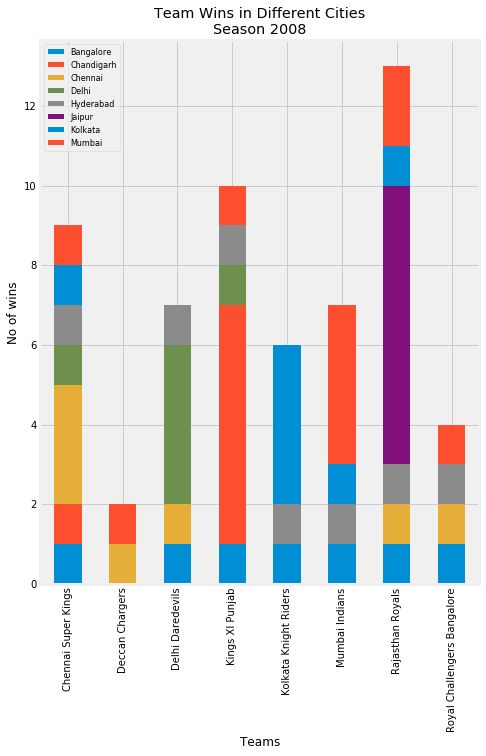

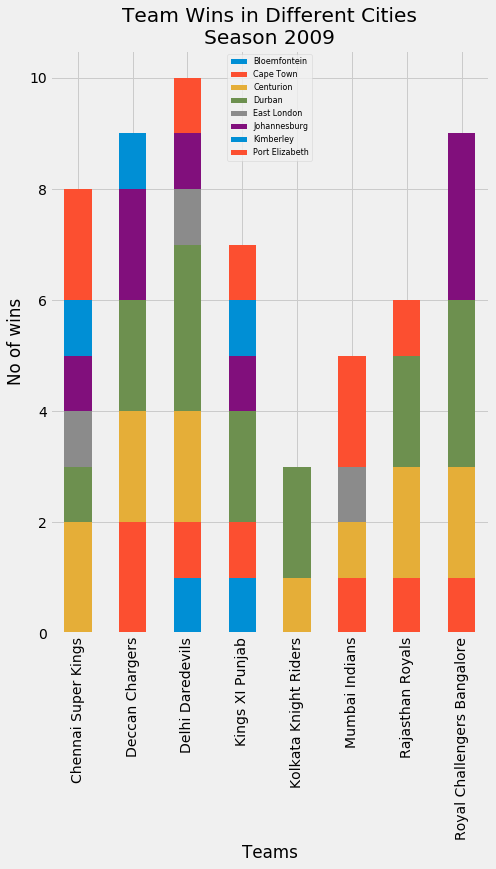

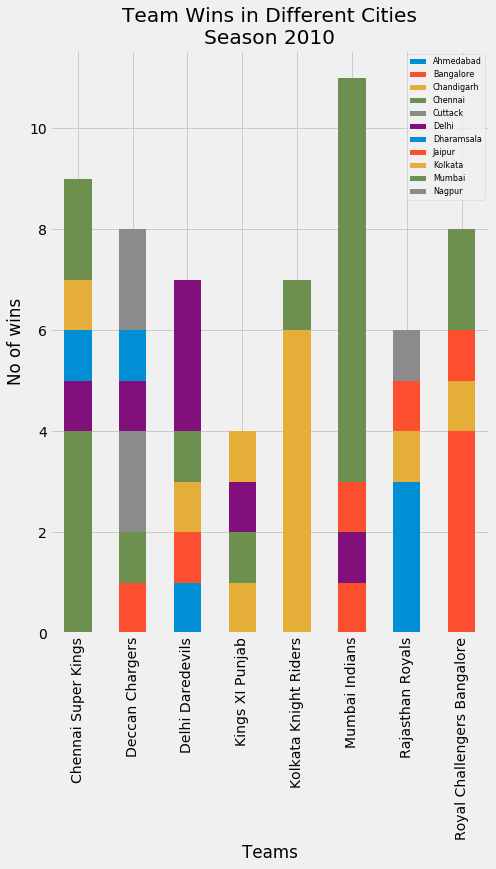

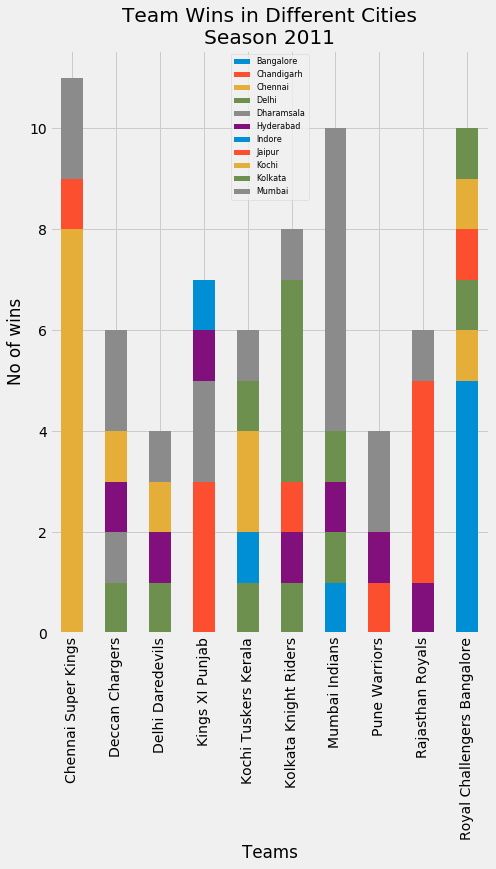

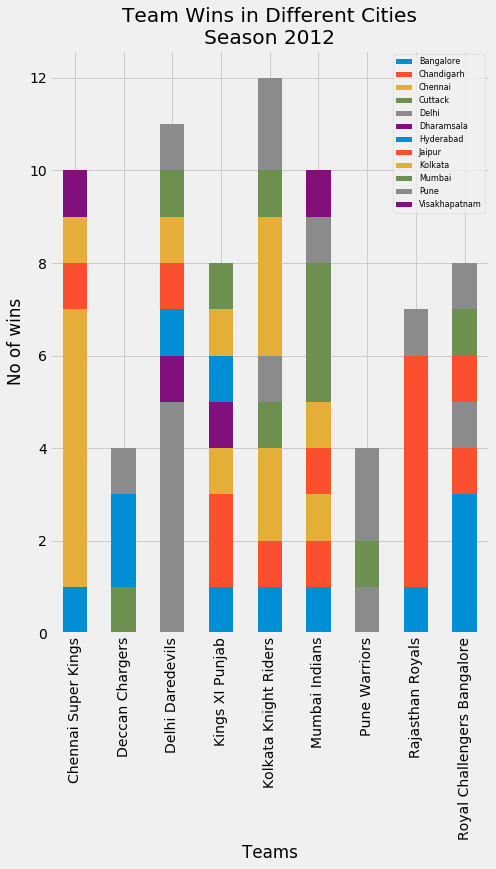

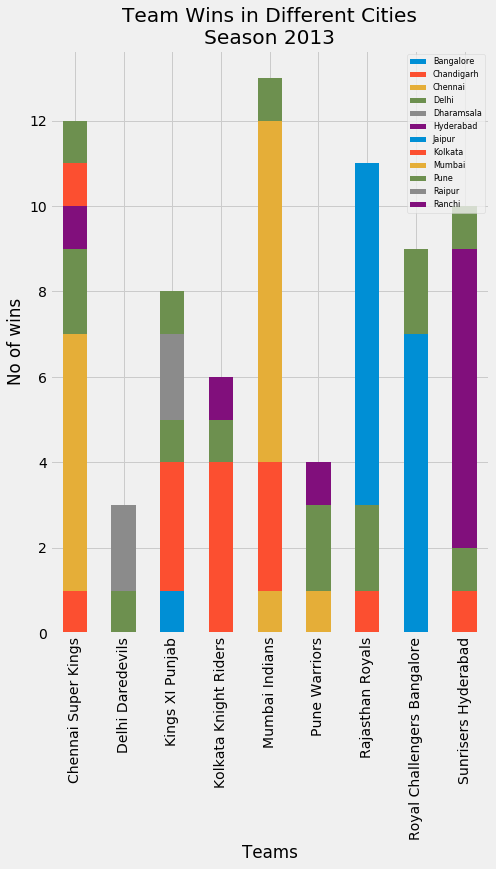

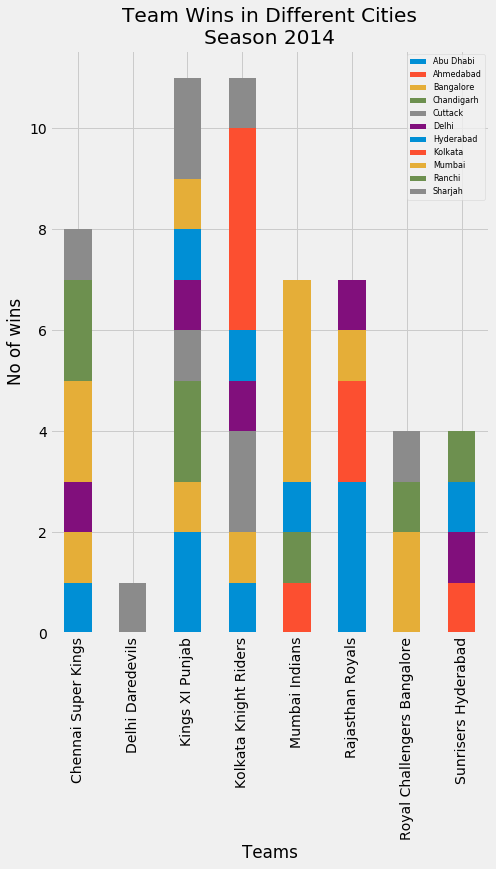

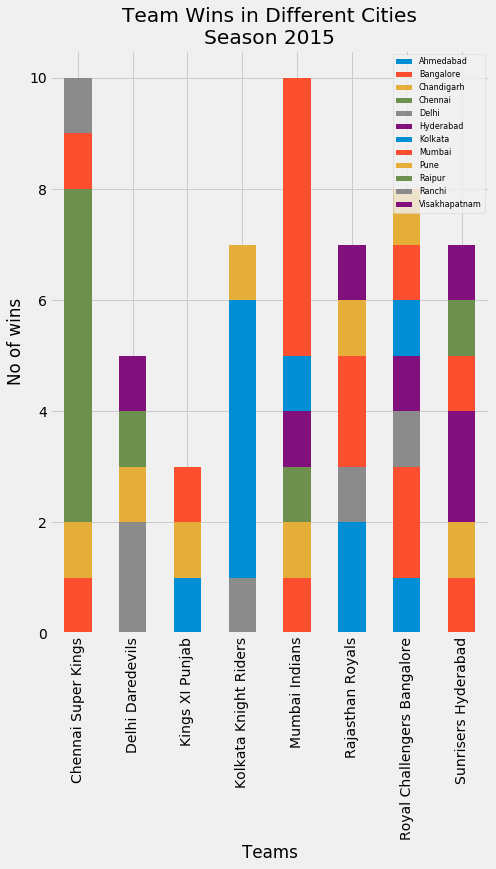

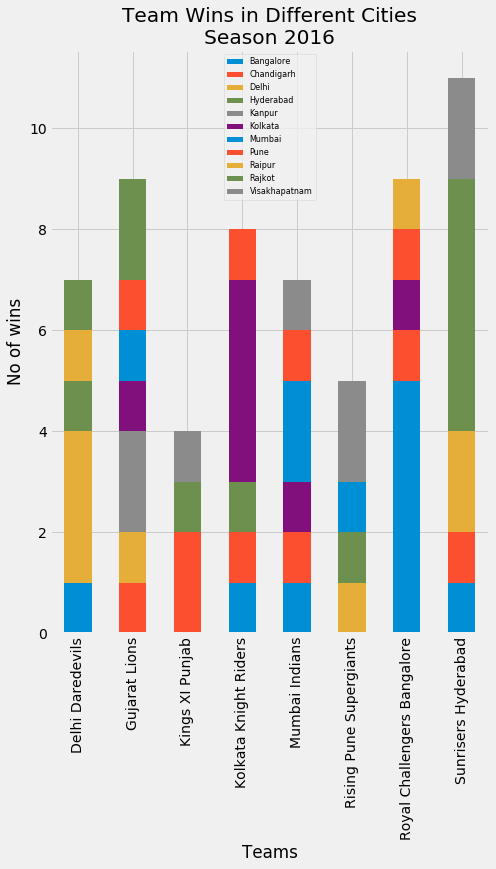

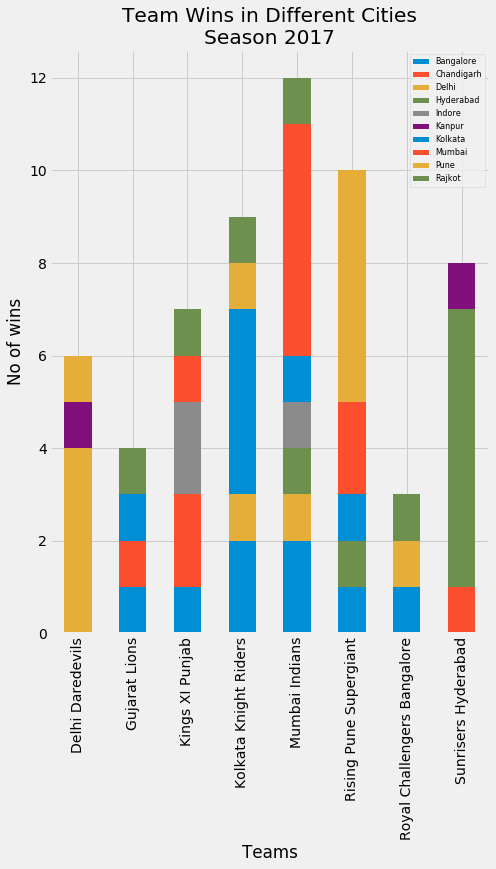

In [62]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})
%matplotlib inline
x,y=2008, 2018
while x<y:
    wins_percity=matches[matches['season']== x].groupby(['winner', 'city'])['id'].count().unstack()
    plot=wins_percity.plot(kind='bar', stacked=True, title="Team Wins in Different Cities\nSeason "+str(x), figsize=(7,10))
    sns.set_palette("Paired", len(matches['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,10))
    x+=1
    

# TOP BATSMEN

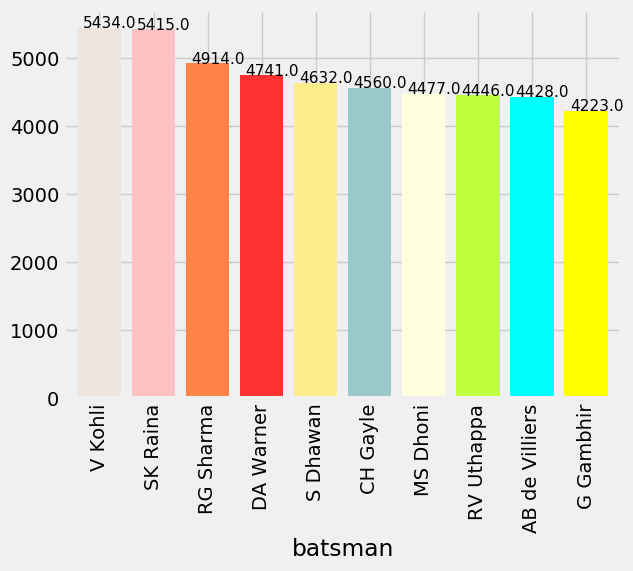

In [61]:
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
colors = ['#EEE5DE','#FFC1C1','#FF8247','#FF3030','#FFEC8B','#9AC9CB','#FFFFE0','#C0FF3E','#00FFFF','#FFFF00','#C4C4C4']
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=colors)
plt.figure(figsize=(10,10))   
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=11)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,10))
 
plt.show()

# TOP BOWLERS

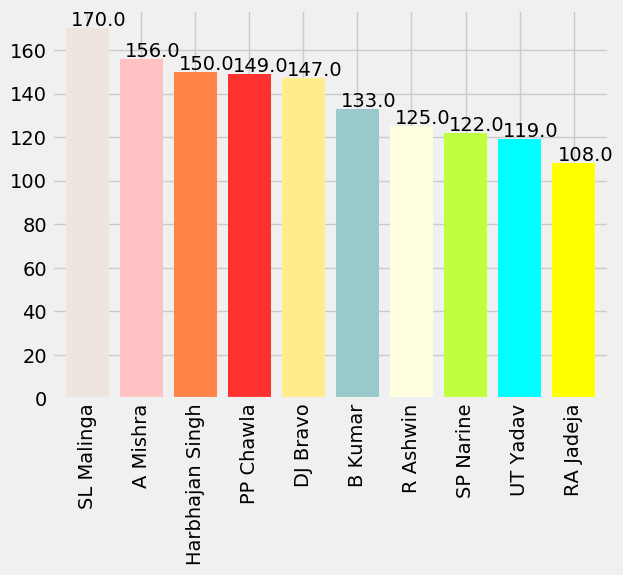

In [60]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=colors)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
    plt.figure(figsize=(10,10))
    plt.style.use('fivethirtyeight')
plt.show()

# RESULT OF MATCH VS COUNTS

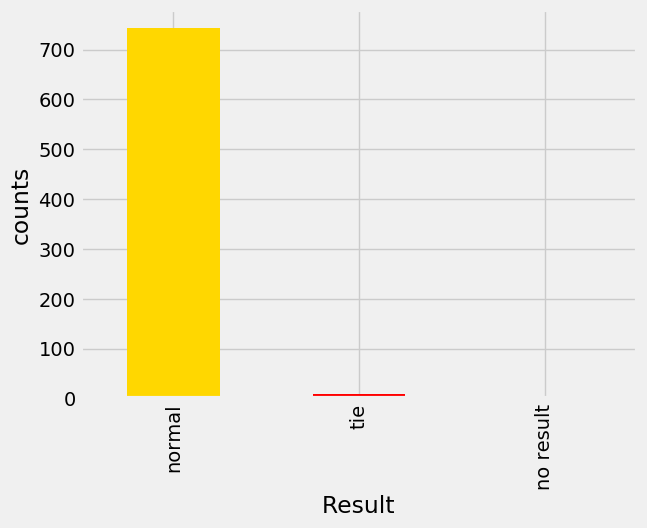

In [59]:
counts2=matches['result'].value_counts()
counts2.plot(kind='bar',color=['gold','r','g'])
plt.ylabel("counts")
plt.xlabel("Result")
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')

# TOSS DECISION VS COUNTS

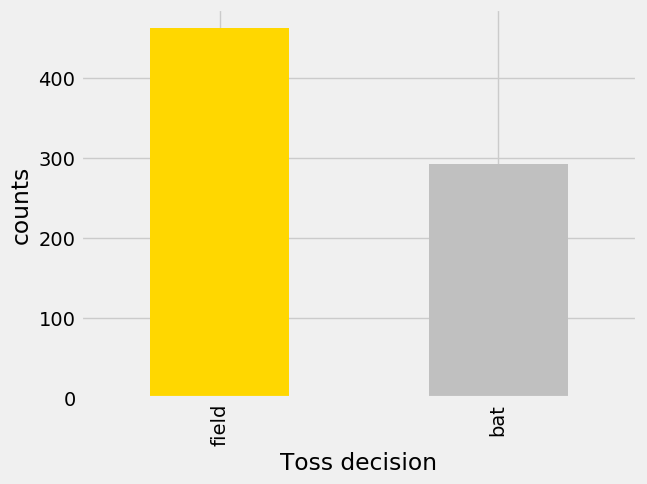

In [58]:
counts4=matches['toss_decision'].value_counts()
counts4.plot(kind='bar',color=['gold','silver'])
plt.xlabel("Toss decision")
plt.ylabel("counts")
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')

# YEAR VS NUMBER OF MATCHES PLAYED

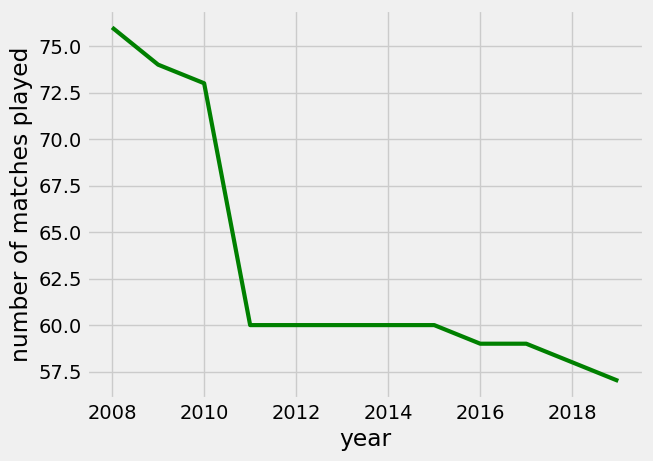

In [57]:
z=matches.sort_values("season",ascending=True)
y=z["season"].value_counts().values
x=z["season"].unique()
plt.plot(x,y,color="g",linewidth=3)
plt.xlabel("year")
plt.ylabel("number of matches played")
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.show()

# % OF RUNS SCORED THROUGH BOUNDARIES

In [55]:
#batsman aggregate
batsman_grp=deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen=batsman_grp["batsman_runs"].sum().reset_index()
#ignoring wide balls
balls_faced=deliveries[deliveries["wide_runs"]==0]
balls_faced=balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns=["match_id","inning","batsman", "balls_faced"]
batsmen=batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], right_on=["match_id", "inning", "batsman"],
                      how="left")
fours=deliveries[ deliveries["batsman_runs"]==4]
sixes=deliveries[ deliveries["batsman_runs"]==6]

fours_per_batsman=fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman=sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index() 

fours_per_batsman.columns=["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns=["match_id", "inning", "batsman", "6s"]

batsmen=batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], right_on=["match_id", "inning", "batsman"],
                      how="left")

batsmen=batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], right_on=["match_id", "inning", "batsman"],
                      how="left")

batsmen['SR']=np.round(batsmen['batsman_runs']/ batsmen['balls_faced']*100, 2)
for col in["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col]=batsmen[col].fillna(0)
    
dismissals=deliveries[ pd.notnull(deliveries["player_dismissed"])]
dismissals=dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed":"batsman"}, inplace=True)
batsmen=batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], right_on=["match_id","inning", "batsman"],
                      how="left")
batsmen=matches[['id','season']].merge(batsmen, left_on='id', right_on='match_id', how='left').drop('id', axis=1)
batsmen.head()
                      

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00,caught,Mandeep Singh
2,2017,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,0.0,1.0,133.33,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54,caught,Sachin Baby
4,2017,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,0.0,129.03,caught,Sachin Baby


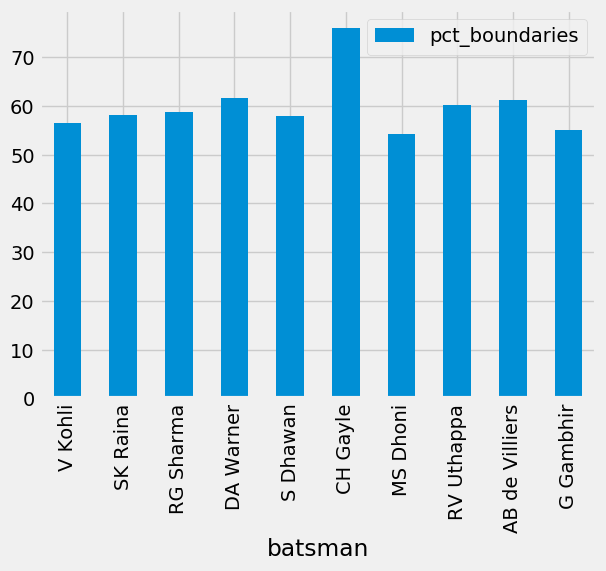

In [56]:
batsman_runs= batsmen.groupby(['batsman'])['batsman_runs', '4s', '6s'].sum().reset_index()
batsman_runs['4s_6s']= batsman_runs['4s'] * 4 + batsman_runs['6s']*6 
batsman_runs['pct_boundaries']= np.round(batsman_runs['4s_6s'] /  batsman_runs['batsman_runs']*100, 2)
batsman_runs= batsman_runs.sort_values(by ='batsman_runs', ascending=False)
batsman_runs[:10].plot(x='batsman', y='pct_boundaries', kind='bar')
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')

# TOP 5 BATSMEN OVER THE SEASON

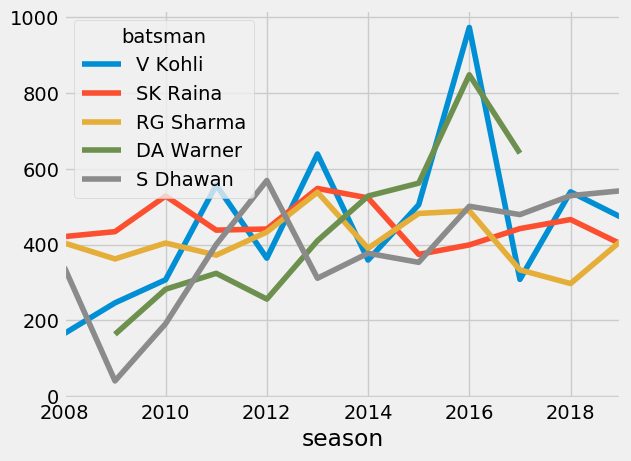

In [53]:
batsman_runsperseason= batsmen.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason= batsman_runsperseason.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total']= batsman_runsperseason.sum(axis=1)

batsman_runsperseason= batsman_runsperseason.sort_values(by = 'Total', ascending=False).drop('Total',1)
ax=batsman_runsperseason[:5].T.plot()
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')

# IMPACT OF TOSS RESULT ON MATCH OUTCOME

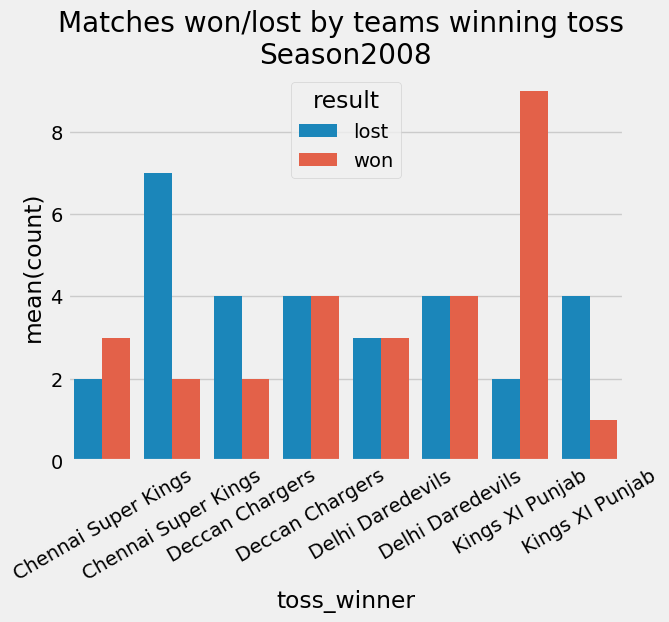

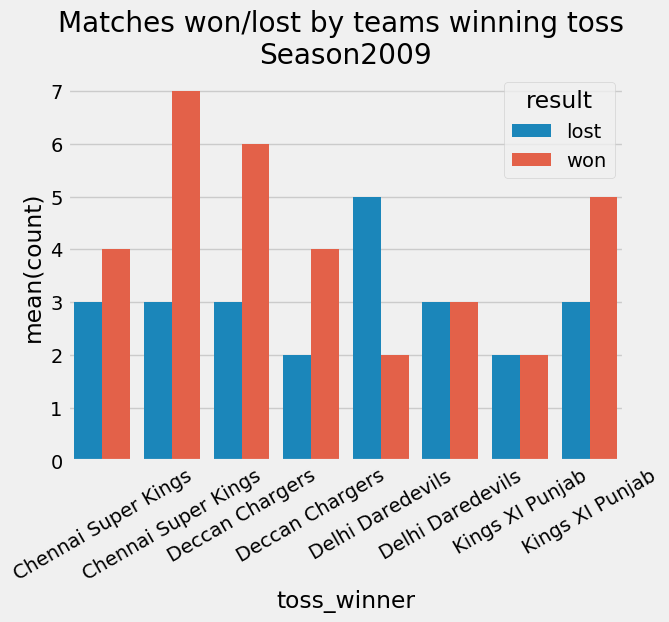

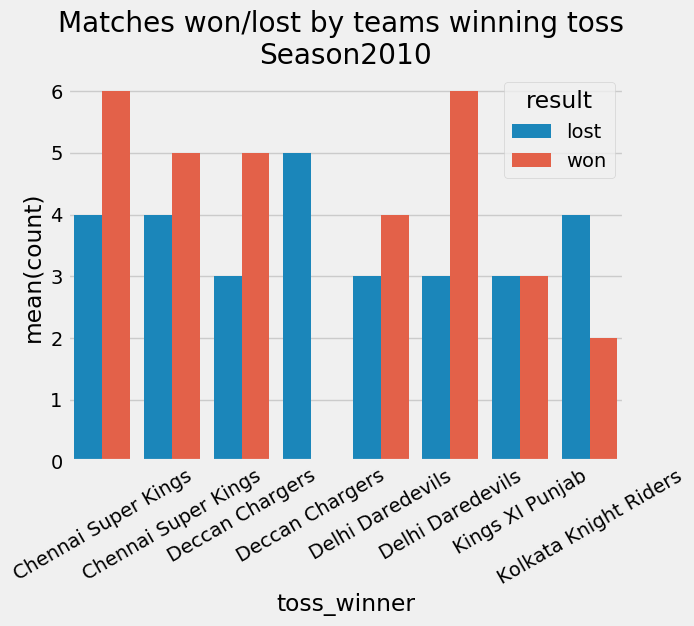

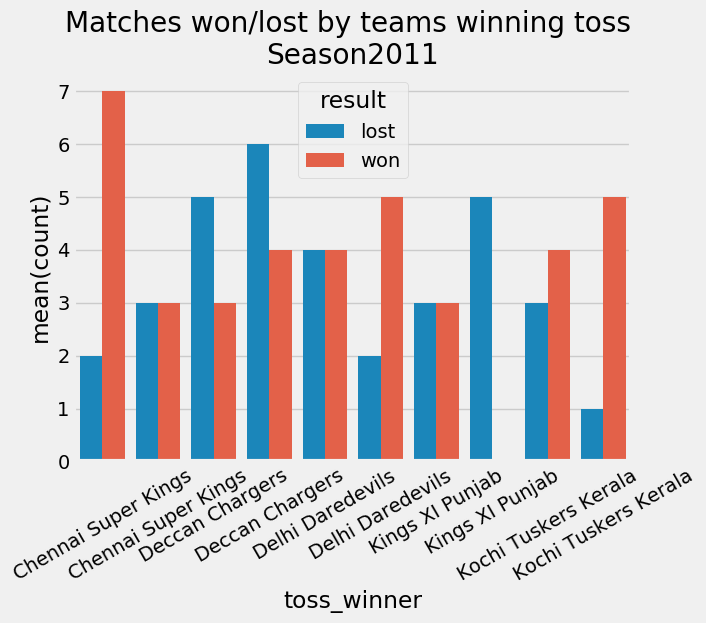

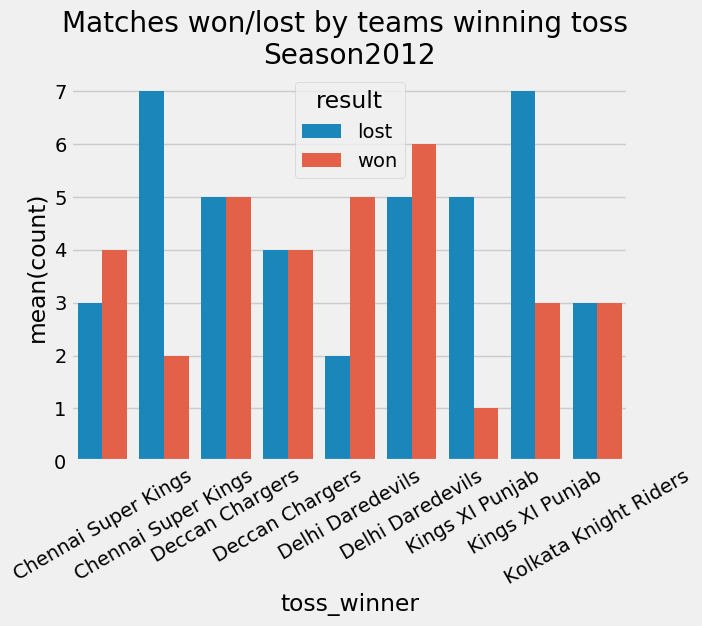

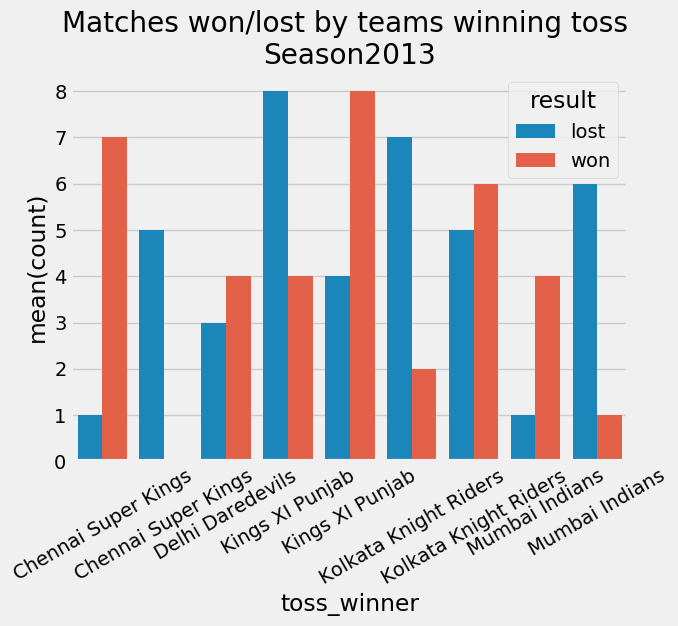

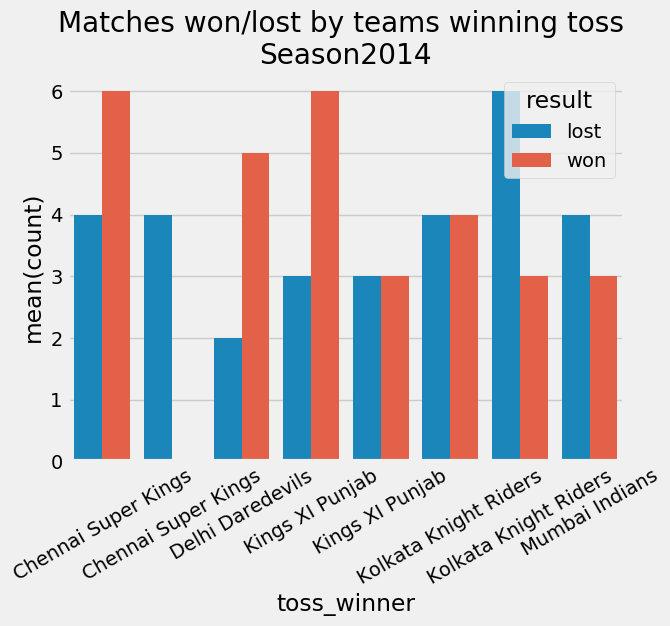

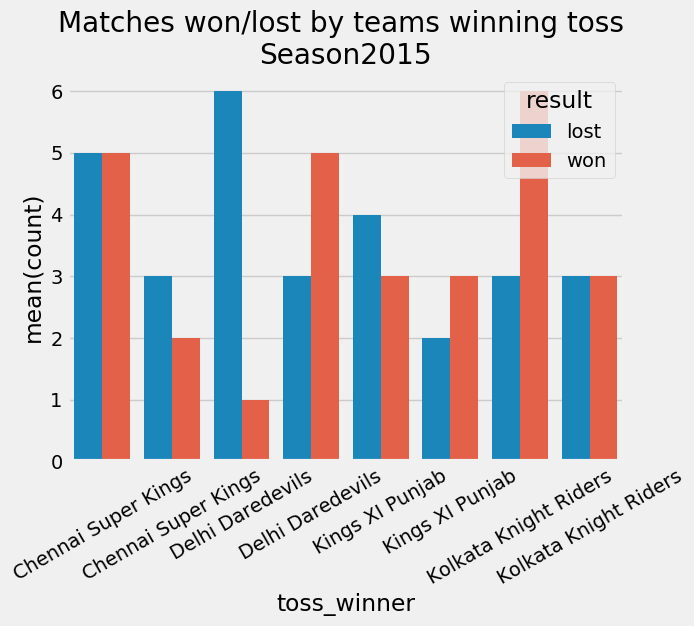

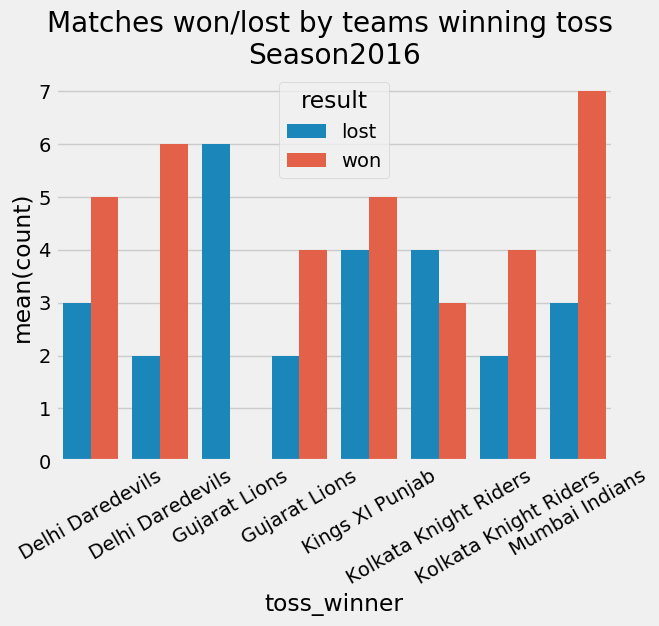

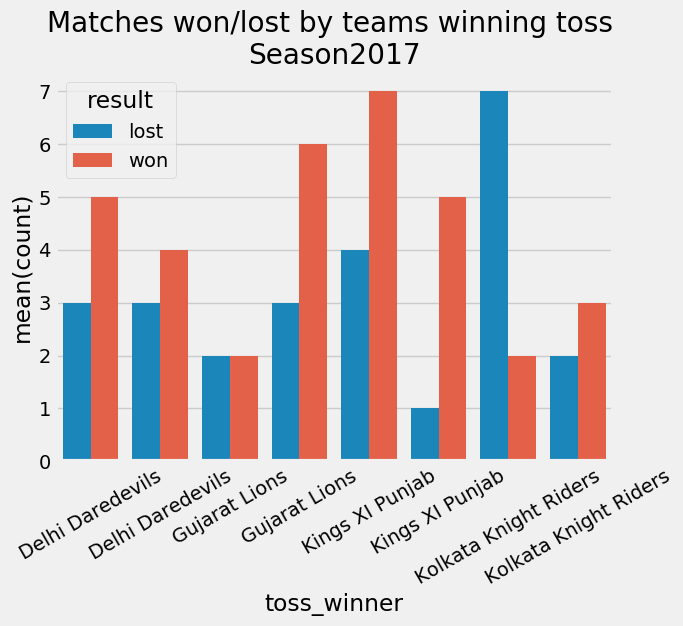

In [52]:
toss=matches.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name= 'count')
toss['result']=np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result=toss.groupby(['season','toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2018, 1):
    toss_result_x= toss_result[toss_result['season']==x]
    plot=sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason' +str(x))
    plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.figure(figsize=(10,10))
    plt.style.use('fivethirtyeight')
    plt.show()
    x+=1

# IS TOSS WINNER ALSO THE MATCH WINNER?

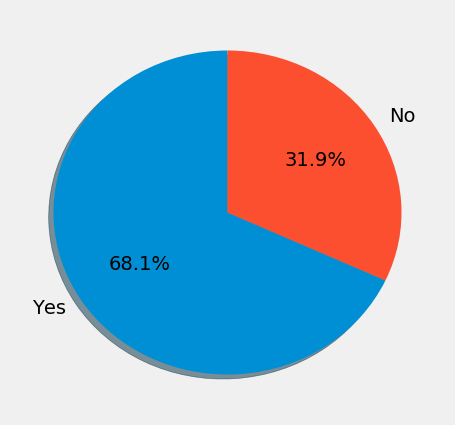

In [51]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.show()

# TOTAL RUNS IN EVERY SEASON

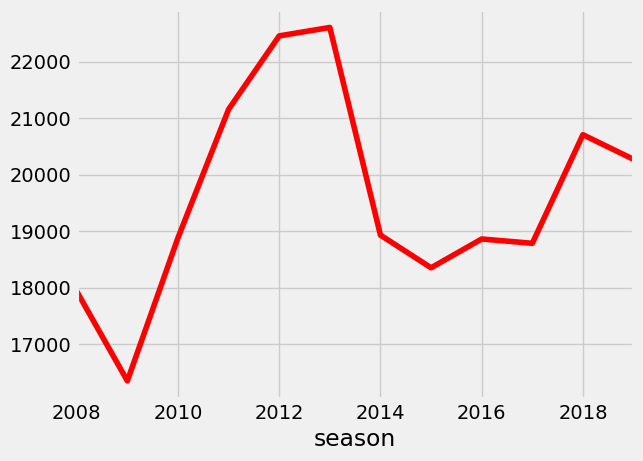

In [50]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum()
season.plot(color="red")
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.show()

# MI VS CSK

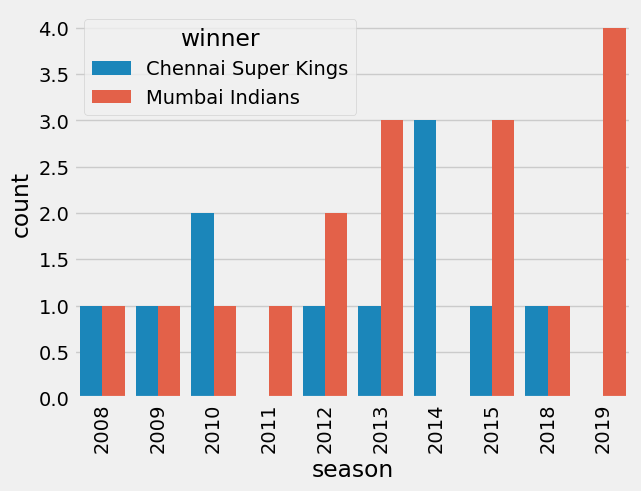

In [49]:
plt.style.use('fivethirtyeight')
mt2=matches[((matches['team1']=='Mumbai Indians')|(matches['team2']=='Mumbai Indians'))&((matches['team1']=='Chennai Super Kings')|(matches['team2']=='Chennai Super Kings'))]
sns.countplot(x='season', hue='winner', data=mt2)
plt.xticks(rotation='vertical')
plt.show()

# CHANCE OF CHASING 200+ SCORE

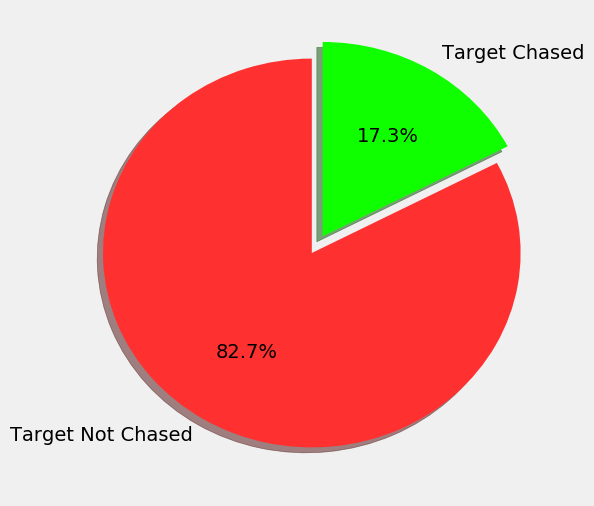

In [48]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['Target Not Chased','Target Chased']
plt.pie(slices,labels=labels,colors=['#FF3030', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.show()

# OVERALL PERFORMANCE OF TEAMS

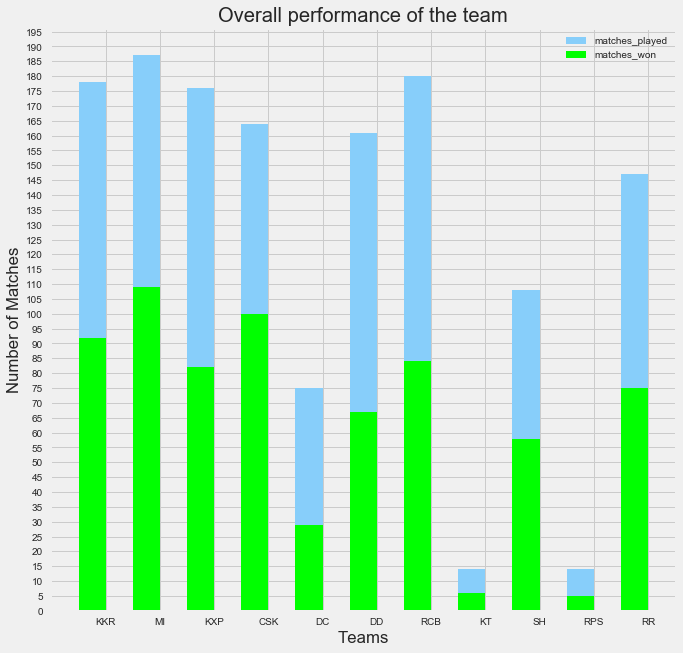

In [17]:
matches_played_KKR=matches[(matches['team1']=='Kolkata Knight Riders') | (matches['team2']=='Kolkata Knight Riders')]
matches_played_MI=matches[(matches['team1']=='Mumbai Indians') | (matches['team2']=='Mumbai Indians')]
matches_played_KXP=matches[(matches['team1']=='Kings XI Punjab') | (matches['team2']=='Kings XI Punjab')]
matches_played_CSK=matches[(matches['team1']=='Chennai Super Kings') | (matches['team2']=='Chennai Super Kings')]
matches_played_DC=matches[(matches['team1']=='Deccan Chargers') | (matches['team2']=='Deccan Chargers')]
matches_played_DD=matches[(matches['team1']=='Delhi Daredevils') | (matches['team2']=='Delhi Daredevils')]
matches_played_RCB=matches[(matches['team1']=='Royal Challengers Bangalore') | (matches['team2']=='Royal Challengers Bangalore')]
matches_played_KT=matches[(matches['team1']=='Kochi Tuskers Kerala') | (matches['team2']=='Kochi Tuskers Kerala')]
matches_played_SH=matches[(matches['team1']=='Sunrisers Hyderabad') | (matches['team2']=='Sunrisers Hyderabad')]
matches_played_RPS=matches[(matches['team1']=='Rising Pune Supergiants') | (matches['team2']=='Rising Pune Supergiants')]
matches_played_RR=matches[(matches['team1']=='Rajasthan Royals') | (matches['team2']=='Rajasthan Royals')]
A=matches_played_KKR['id'].count()
B=matches_played_MI['id'].count()
C=matches_played_KXP['id'].count()
D=matches_played_CSK['id'].count()
E=matches_played_DC['id'].count()
F=matches_played_DD['id'].count()
G=matches_played_RCB['id'].count()
H=matches_played_KT['id'].count()
I=matches_played_SH['id'].count()
J=matches_played_RPS['id'].count()
K=matches_played_RR['id'].count()

matches_won_KKR=matches[matches['winner']=='Kolkata Knight Riders']
matches_won_MI=matches[matches['winner']=='Mumbai Indians']
matches_won_KXP=matches[matches['winner']=='Kings XI Punjab']
matches_won_CSK=matches[matches['winner']=='Chennai Super Kings']
matches_won_DC=matches[matches['winner']=='Deccan Chargers']
matches_won_DD=matches[matches['winner']=='Delhi Daredevils']
matches_won_RCB=matches[matches['winner']=='Royal Challengers Bangalore']
matches_won_KT=matches[matches['winner']=='Kochi Tuskers Kerala']
matches_won_SH=matches[matches['winner']=='Sunrisers Hyderabad']
matches_won_RPS=matches[matches['winner']=='Rising Pune Supergiants']
matches_won_RR=matches[matches['winner']=='Rajasthan Royals']


O=matches_won_KKR['id'].count()
P=matches_won_MI['id'].count()
Q=matches_won_KXP['id'].count()
R=matches_won_CSK['id'].count()
S=matches_won_DC['id'].count()
T=matches_won_DD['id'].count()
U=matches_won_RCB['id'].count()
V=matches_won_KT['id'].count()
W=matches_won_SH['id'].count()
X=matches_won_RPS['id'].count()
Y=matches_won_RR['id'].count()


n_bins = 11
ind = np.arange(n_bins)
width = 0.50

plt.figure(figsize=(10,10))

matches_played=[A,B,C,D,E,F,G,H,I,J,K]
matches_won=[O,P,Q,R,S,T,U,V,W,X,Y]

p1 = plt.bar(ind, matches_played, width, color='LightSkyBlue')
p2 = plt.bar(ind, matches_won, width, color='Lime')

plt.ylabel('Number of Matches')
plt.xlabel('Teams')
plt.title('Overall performance of the team')
plt.xticks(ind + width/2., ('KKR', 'MI', 'KXP', 'CSK', 'DC', 'DD', 'RCB', 'KT', 'SH', 'RPS', 'RR'))
plt.yticks(np.arange(0, 200, 5))
plt.legend((p1[0], p2[0]), ('matches_played', 'matches_won'))

# WINNING PERCENTAGE OF TEAMS BY LARGE MARGINS

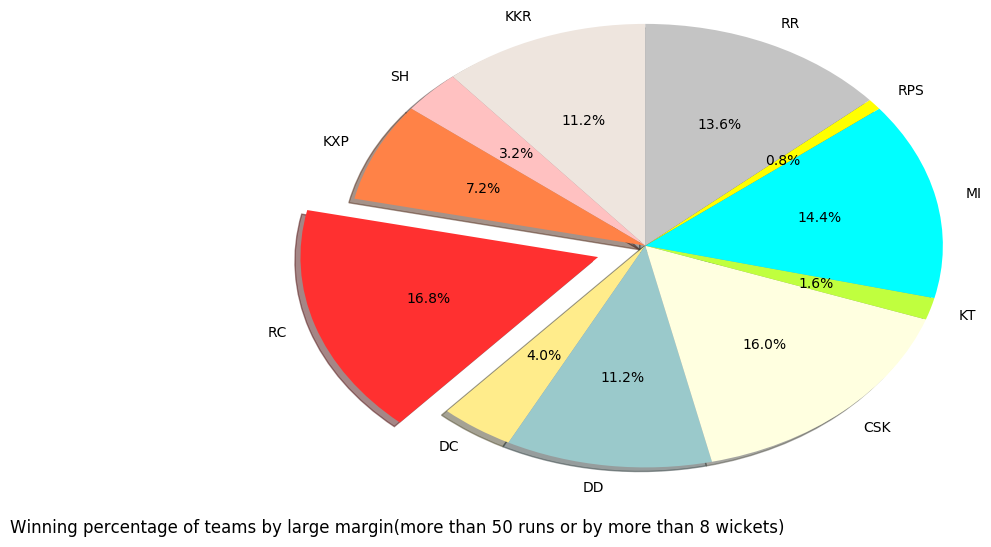

In [18]:
plt.rcdefaults()
labels = ['KKR','SH','KXP','RC','DC','DD','CSK','KT','MI','RPS','RR']
sizes = [14, 4, 9, 21, 5, 14 , 20 ,2 ,18 ,1 , 17]
colors = ['#EEE5DE','#FFC1C1','#FF8247','#FF3030','#FFEC8B','#9AC9CB','#FFFFE0','#C0FF3E','#00FFFF','#FFFF00','#C4C4C4']
explode = (0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 7th slice (i.e. 'RC')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,radius=1.5)
plt.title("Winning percentage of teams by large margin(more than 50 runs or by more than 8 wickets)",x=0,y=-0.3)
plt.style.use('fivethirtyeight')

#Percentage of wins by team which is greater than or equal to 50 runs or by grater than or equal to 8 wickets

# BIGGEST WINS(BY RUNS) PER SEASON

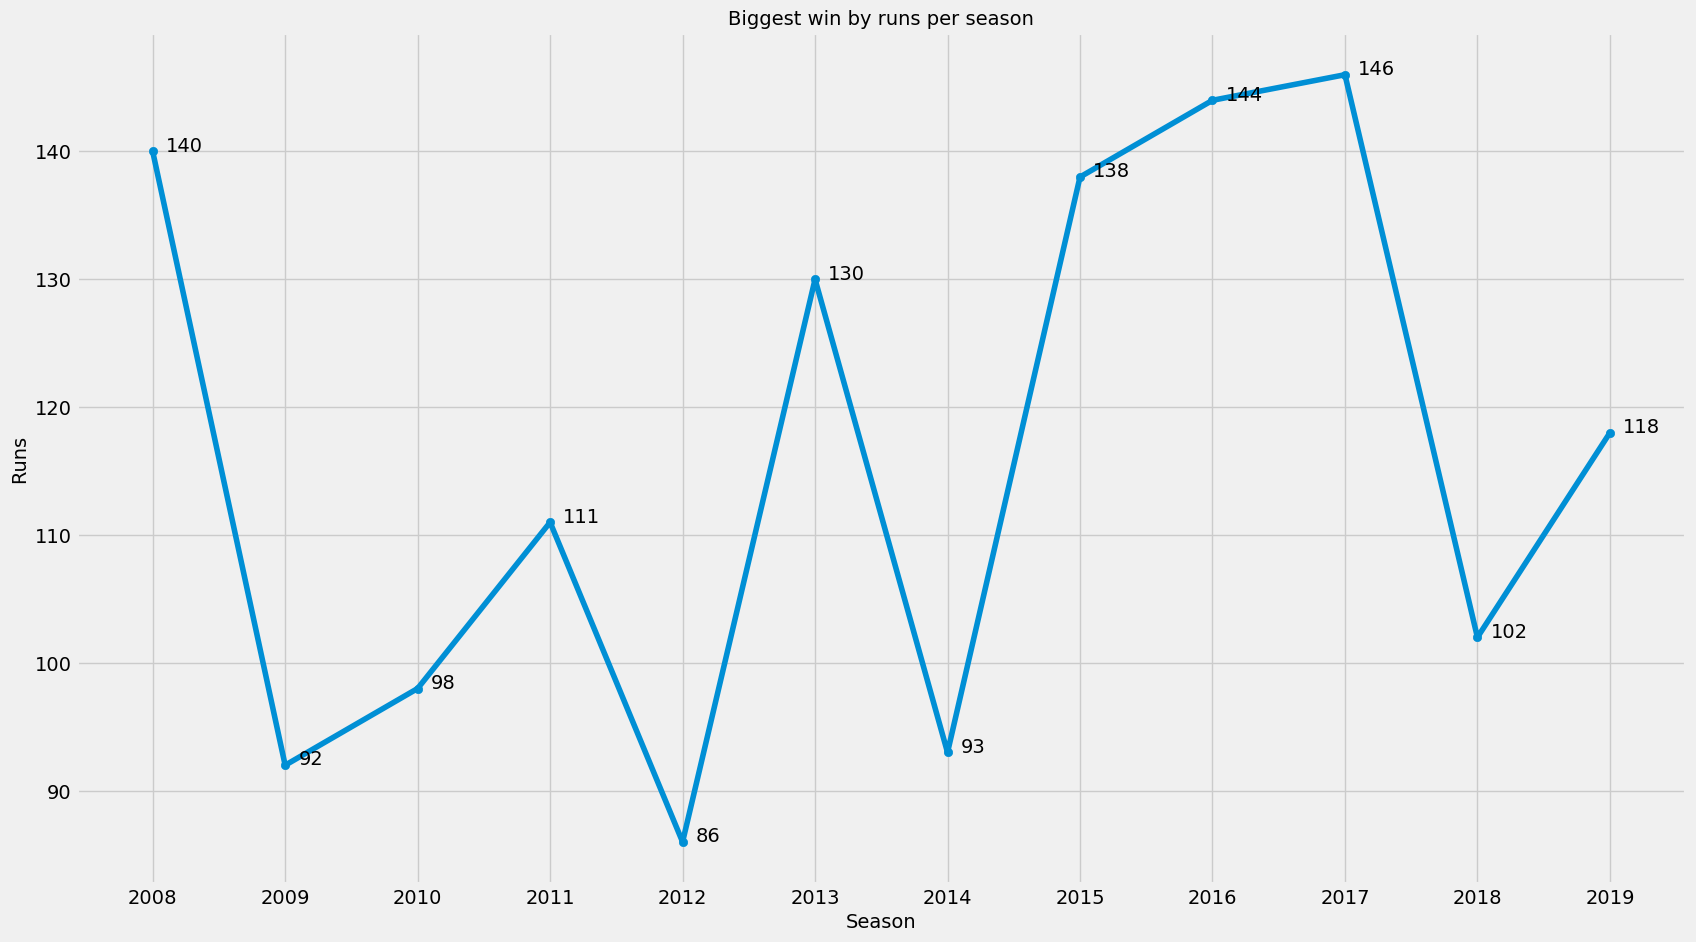

In [19]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(matches[matches['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.style.use('fivethirtyeight')
plt.show()

# 2. CREATING OUR ML MODEL

# IMPORTING THE DATASET

In [20]:
ipl_old=pd.read_csv(r"C:\Users\user\Desktop\matches.csv",index_col="id")
ipl_old.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# SELECTING FEATURES <br>
The important features for predicting the outcome of a match are **team1**,<br>
**team2**,**toss_winner**,**toss_decision**,**city** and **venue**. So we will take <br>
these columns and drop other columns as they are not of much use.Also we will take <br>
**winner** column as it is the output.


In [21]:
ipl=ipl_old[["city","team1","team2","toss_winner","toss_decision","venue","winner"]]
ipl.head()

,city,team1,team2,toss_winner,toss_decision,venue,winner
id,,,,,,,
1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
2,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
3,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
4,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Holkar Cricket Stadium,Kings XI Punjab
5,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,M Chinnaswamy Stadium,Royal Challengers Bangalore


**As city and Venue are closely related we will <br> select venue and drop city.**

In [22]:
ipl=ipl.drop(["city"],axis=1)
ipl.head()

,team1,team2,toss_winner,toss_decision,venue,winner
id,,,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Holkar Cricket Stadium,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,M Chinnaswamy Stadium,Royal Challengers Bangalore


# CLEANING OUR DATA
Here we will delete rows with null values and edit duplicate names.

In [23]:
ipl["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Here we notice that Rising Pune Supergiant and Rising Pune Supergiants<br>
represent the same team.So we need to edit it.

In [24]:
ipl["team1"]=ipl["team1"].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'], dtype=object)

In [25]:
ipl["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [26]:
ipl["team2"]=ipl["team2"].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Delhi Capitals'], dtype=object)

In [27]:
ipl["toss_winner"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [28]:
ipl["toss_winner"]=ipl["toss_winner"].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl["toss_winner"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'], dtype=object)

In [29]:
ipl["toss_decision"].unique()

array(['field', 'bat'], dtype=object)

In [30]:
ipl["venue"].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [31]:
ipl["winner"].unique()
ipl["winner"]=ipl["winner"].replace('Rising Pune Supergiant','Rising Pune Supergiants')
ipl["winner"].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Daredevils',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Delhi Capitals'], dtype=object)

In [32]:
ipl=ipl.dropna(how="any")
ipl_new=ipl
ipl.head()

,team1,team2,toss_winner,toss_decision,venue,winner
id,,,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,Maharashtra Cricket Association Stadium,Rising Pune Supergiants
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
4,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,Holkar Cricket Stadium,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,M Chinnaswamy Stadium,Royal Challengers Bangalore


# CHANGING TEXT IN FEATURES TO NUMERICAL VALUES
For the columns containing text,they will only be able to assist the model<br>
in the prediction only if they have numerical values.So, we need to change the string<br>
values to numerical values.

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
ipl_new["team1"]=encoder.fit_transform(ipl["team1"])
ipl_new["team2"]=encoder.fit_transform(ipl["team2"])
ipl_new["venue"]=encoder.fit_transform(ipl["venue"])
ipl_new["winner"]=encoder.fit_transform(ipl["winner"])
ipl_new["toss_winner"]=encoder.fit_transform(ipl["toss_winner"])
ipl_new.head()


,team1,team2,toss_winner,toss_decision,venue,winner
id,,,,,,
1,13,12,12,field,28,13
2,8,11,11,field,21,11
3,4,7,7,field,31,7
4,11,5,5,field,13,5
5,12,3,12,bat,17,12


We will train our model according to team1.We would like to predict if team1<br>
will win or not.So to make toss_winner and toss_decision column more logical,we will<br>
make them according to team1.<br>
So we will make three columns team1_toss_win,team1_bat,team1_win.

In [34]:
ipl_new.loc[ipl_new["team1"]==ipl_new["toss_winner"],"team1_toss_win"]=2
ipl_new.loc[ipl_new["team1"]!=ipl_new["toss_winner"],"team1_toss_win"]=1
ipl_new.head()

,team1,team2,toss_winner,toss_decision,venue,winner,team1_toss_win
id,,,,,,,
1,13,12,12,field,28,13,1.0
2,8,11,11,field,21,11,1.0
3,4,7,7,field,31,7,1.0
4,11,5,5,field,13,5,1.0
5,12,3,12,bat,17,12,2.0


In [35]:
ipl_new.loc[(ipl_new["team1_toss_win"]==2.0)&(ipl_new["toss_decision"]=="bat"),"team1_bat"]=2
ipl_new.loc[(ipl_new["team1_toss_win"]==1.0)&(ipl_new["toss_decision"]=="field"),"team1_bat"]=2
ipl_new.loc[(ipl_new["team1_toss_win"]==2.0)&(ipl_new["toss_decision"]=="field"),"team1_bat"]=1
ipl_new.loc[(ipl_new["team1_toss_win"]==1.0)&(ipl_new["toss_decision"]=="bat"),"team1_bat"]=1
ipl_new.head(20)

,team1,team2,toss_winner,toss_decision,venue,winner,team1_toss_win,team1_bat
id,,,,,,,,
1,13,12,12,field,28,13,1.0,2.0
2,8,11,11,field,21,11,1.0,2.0
3,4,7,7,field,31,7,1.0,2.0
4,11,5,5,field,13,5,1.0,2.0
5,12,3,12,bat,17,12,2.0,2.0
6,4,13,13,field,28,13,1.0,2.0
7,7,8,8,field,40,8,1.0,2.0
8,12,5,12,bat,13,5,2.0,2.0
9,3,11,11,field,21,3,1.0,2.0


In [36]:
ipl_new.loc[ipl_new["team1"]==ipl_new["winner"],"team1_win"]=1
ipl_new.loc[ipl_new["team1"]!=ipl_new["winner"],"team1_win"]=0
ipl_new.head()

,team1,team2,toss_winner,toss_decision,venue,winner,team1_toss_win,team1_bat,team1_win
id,,,,,,,,,
1,13,12,12,field,28,13,1.0,2.0,1.0
2,8,11,11,field,21,11,1.0,2.0,0.0
3,4,7,7,field,31,7,1.0,2.0,0.0
4,11,5,5,field,13,5,1.0,2.0,0.0
5,12,3,12,bat,17,12,2.0,2.0,1.0


Now we will drop **toss_winner**,**toss_decision** and **winner** columns<br>
as all the useful information had been extracted from them.

In [37]:
ipl_new=ipl_new.drop(["toss_winner","toss_decision","winner"],axis=1)
ipl_new.head()

,team1,team2,venue,team1_toss_win,team1_bat,team1_win
id,,,,,,
1,13,12,28,1.0,2.0,1.0
2,8,11,21,1.0,2.0,0.0
3,4,7,31,1.0,2.0,0.0
4,11,5,13,1.0,2.0,0.0
5,12,3,17,2.0,2.0,1.0


# MAKING CORRELATION MATRIX
Correlation matrix shows us relationship between different columns.<br>
If absolute values of correlation between two columns is very close to 1<br>
then it means that they represent same value and dropping any one will not<br>
alter the result much.

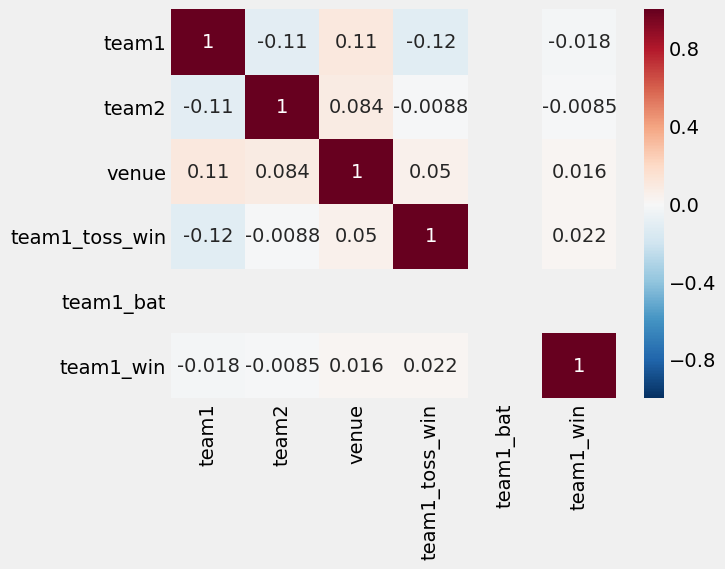

In [38]:
import seaborn as sns
corrmtx=ipl_new.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

As we can see that correlation between any two features is not close to 1<br>
,hence all features are important.

# SPLITTING AND SCALING THE DATA
As everything is now done,its time to split the data into train <br>
data and test data.

In [39]:
X=ipl_new.drop(["team1_win"],axis=1).values
X.ndim

2

In [40]:
Y=ipl_new["team1_win"].values
Y=Y.reshape(-1,1)
Y.ndim

2

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# TRAINING AND TESTING THE MODEL
Here we are using two algorithms<br>
1.Logistic Regression<br>
2.SVM

# LOGISTIC REGRESSION
Logistic regression is a kind of statistical analysis that is used to predict the outcome of a dependent variable based on prior observations. For example, an algorithm could determine the winner of a presidential election based on past election results and economic data. Logistic regression algorithms are popular in machine learning.

In [43]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)
LR.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
from sklearn.metrics import accuracy_score
y_pred=LR.predict(x_test)
print("Acurracy of our model is :")
accuracy_score(y_test,y_pred)

Acurracy of our model is :


0.61589403973509937

# SUPPORT VECTOR MACHINES
A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

In [45]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto")
svm_clf.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_pred=svm_clf.predict(x_test)
print("Acurracy of our model is :")
accuracy_score(y_test,y_pred)

Acurracy of our model is :


0.66225165562913912

# CONCLUSION
We can see that svm gives a better result than logistic regression.
Though the acurracy is not satisfactory but it can be greatly enhanced<br>
if we get data about weather conditions,homeground etc.